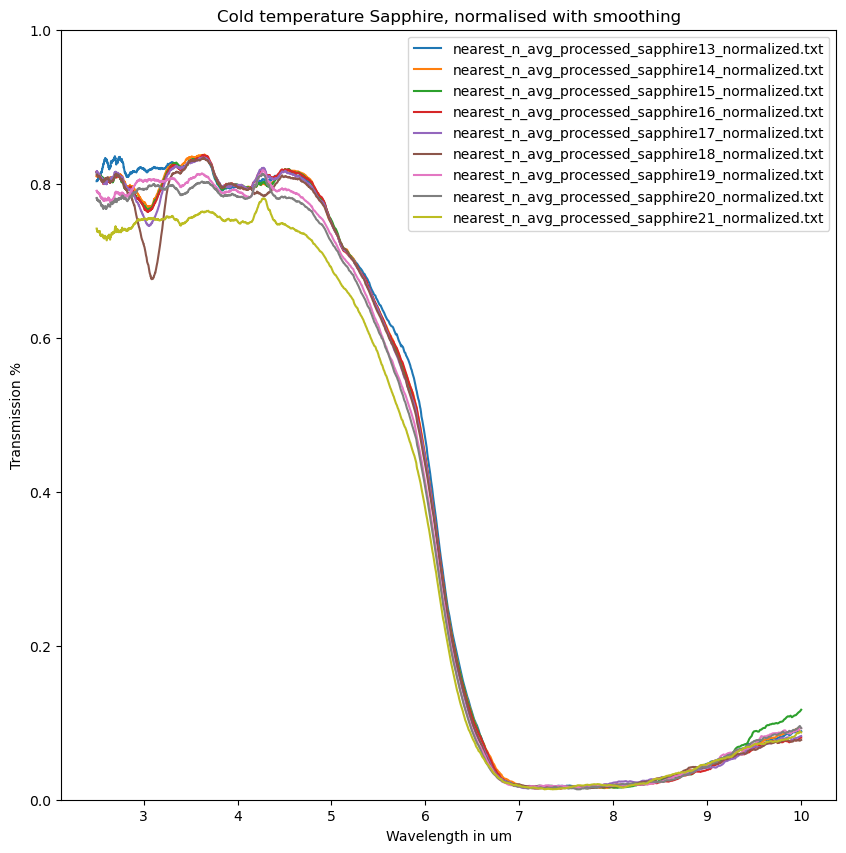

In [37]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import re  # Import the regular expression module
import pandas as pd

# Directory containing your text files
data_directory = "/Users/arpi/data/09.01.24/processed/normalised/nearest_neighbour"

# Get a list of all text files in the directory
file_list = [file for file in os.listdir(data_directory) if file.endswith(".txt")]

# Function to extract numerical part from the file name
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    if match:
        return int(match.group())
    else:
        return 0

# Function to plot the data from a file with color gradient
def plot_file(file_path, total_files):
    data = np.loadtxt(file_path)
    wavelength = data[:, 0]
    transmission = data[:, 1]

    # Define the color gradient
    cmap = plt.get_cmap('viridis')
    norm = Normalize(vmin=1, vmax=20)  # Adjust based on your specified range

    # Get the color based on the normalized file index
    file_index = extract_number(os.path.basename(file_path))
    color = cmap(norm(file_index))
    
    plt.plot(wavelength, transmission, label=os.path.basename(file_path))

plt.figure(figsize=(10, 10))

# Iterate through files and plot each one with color gradient
for file_name in sorted(file_list, key=extract_number):
    file_path = os.path.join(data_directory, file_name)
    plot_file(file_path, len(file_list))
    

# # Add a colorbar to the plot
# sm = plt.cm.ScalarMappable(cmap='viridis', norm=Normalize(vmin=13, vmax=21))
# sm.set_array([])  # An empty array to map the colorbar to the colormap range
# cbar = plt.colorbar(sm, label='File Index (Normalized)')
# cbar.set_ticks([1,20])  # Adjust based on your specified range

plt.legend()
plt.ylim(0,1)
plt.xlabel('Wavelength in um')
plt.ylabel('Transmission %')
plt.title('Cold temperature Sapphire, normalised with smoothing')

# Show the plot
plt.show()
